In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv('state_ofthe_union_texts.csv')

In [3]:
data.head()

,President,Year,Title,Text
0,George Washington,1790,First State of the Union Address,['I embrace with great satisfaction the opport...
1,George Washington,1790,Second State of the Union Address,['Fellow-Citizens of the Senate and the House ...
2,George Washington,1791,Third State of the Union Address,['Fellow-Citizens of the Senate and the House ...
3,George Washington,1792,Fourth State of the Union Address,['Fellow-Citizens of the Senate and of the Hou...
4,George Washington,1793,Fifth State of the Union Address,['Fellow Citizens of the Senate and of the Hou...


In [4]:
def removeNewLine(text):
    # Replace '\n' sandwiched between words
    text = re.sub(r'(\w)\n(\w)', r'\1 \2', text)
    # Replace '\n' followed directly by a word
    text = re.sub(r'\n(\w)', r' \1', text)
    # Replace literal '\\n' followed directly by a word
    text = re.sub(r'\\n(\w)', r' \1', text)
    return text

In [5]:
data['Text'] = data['Text'].apply(removeNewLine)

In [6]:
# data.Text[0]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

In [9]:
dtm = cv.fit_transform(data['Text'])

In [10]:
dtm

<219x16991 sparse matrix of type '<class 'numpy.int64'>'
	with 333025 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
lda = LatentDirichletAllocation(n_components=12, random_state=42)

In [13]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=12, random_state=42)

In [21]:
for idx, topic in enumerate(lda.components_):
    print(f'Topic {idx}')
    top_fifteen_words = topic.argsort()[-15:]
    print([cv.get_feature_names_out()[i] for i in top_fifteen_words][::-1])
    print('\n')

Topic 0
['spain', 'necessary', 'vessels', 'treaty', 'commerce', 'present', 'shall', 'force', 'powers', 'effect', 'session', 'interests', 'consideration', 'subject', 'proper']


Topic 1
['mexico', 'texas', 'mexican', 'paredes', 'rio', 'annexation', 'grande', 'nueces', '1845', 'revolution', 'redress', 'month', 'applause', 'complaint', 'santa']


Topic 2
['soviet', 'oil', 'ho', 'afghanistan', 'justin', 'isis', 'preserve', 'region', 'unwarranted', 'pillar', 'israel', 'ms', 'drilling', 'allen', 'robert']


Topic 3
['america', 'americans', 'world', 'work', 'tonight', 'let', 'help', 'know', 'jobs', 'children', 've', 'need', 'tax', 'health', 'care']


Topic 4
['men', 'business', 'man', 'work', 'conditions', 'labor', 'possible', 'necessary', 'present', 'way', 'need', 'commerce', 'corporations', 'industrial', 'interstate']


Topic 5
['000', 'gold', 'general', 'spain', 'cuba', 'international', 'islands', 'shall', 'island', 'treasury', 'commission', 'secretary', 'trade', 'military', 'authority']



In [22]:
topics = {0: 'International Relations and Treaties', 1: 'Mexican-American Relations and History', 2: 'Geopolitical Issues and Conflicts', 3: 'American Society and Policy', 4: 'Labor and Industrial Conditions', 5: 'Spanish-American Relations and Trade', 6: 'Federal Programs and Military', 7: 'Government Departments and Foreign Affairs', 8: 'Business and Legislative Needs', 9: 'Constitutional and Legislative Matters', 10: 'Government Reports and Legislation', 11: 'Federal Infrastructure and Agriculture'}

In [23]:
# data['Text'][124]

In [24]:
topic_results = lda.transform(dtm)

In [25]:
data['Topic Number'] = topic_results.argmax(axis=1)

In [26]:
data['Topic'] = data['Topic Number'].map(topics)

In [27]:
data.head()

,President,Year,Title,Text,Topic Number,Topic
0,George Washington,1790,First State of the Union Address,['I embrace with great satisfaction the opport...,9,Constitutional and Legislative Matters
1,George Washington,1790,Second State of the Union Address,['Fellow-Citizens of the Senate and the House ...,9,Constitutional and Legislative Matters
2,George Washington,1791,Third State of the Union Address,['Fellow-Citizens of the Senate and the House ...,9,Constitutional and Legislative Matters
3,George Washington,1792,Fourth State of the Union Address,['Fellow-Citizens of the Senate and of the Hou...,9,Constitutional and Legislative Matters
4,George Washington,1793,Fifth State of the Union Address,['Fellow Citizens of the Senate and of the Hou...,9,Constitutional and Legislative Matters


In [42]:
data = data.replace('by John Adams', 'John Adams')

In [43]:
data.shape

(219, 6)

In [44]:
presidents = pd.read_csv('us_presidents.csv')[['president', 'party']]

In [45]:
def three_parties(text):
    if('republic' in text.lower()):
        return 'Republican'
    elif('democrat' in text.lower()):
        return 'Democratic'
    else:
        return 'Nonpartisan'

In [46]:
presidents['party'] = presidents['party'].apply(three_parties)

In [34]:
# presidents

In [35]:
# presidents.join(temp, how = 'inner', on='president', 

In [47]:
data = pd.merge(data, presidents, left_on='President', right_on='president', how = 'left')

In [49]:
# data.to_csv('combined.csv')

In [50]:
data.head()

,President,Year,Title,Text,Topic Number,Topic,president,party
0,George Washington,1790,First State of the Union Address,['I embrace with great satisfaction the opport...,9,Constitutional and Legislative Matters,George Washington,Nonpartisan
1,George Washington,1790,Second State of the Union Address,['Fellow-Citizens of the Senate and the House ...,9,Constitutional and Legislative Matters,George Washington,Nonpartisan
2,George Washington,1791,Third State of the Union Address,['Fellow-Citizens of the Senate and the House ...,9,Constitutional and Legislative Matters,George Washington,Nonpartisan
3,George Washington,1792,Fourth State of the Union Address,['Fellow-Citizens of the Senate and of the Hou...,9,Constitutional and Legislative Matters,George Washington,Nonpartisan
4,George Washington,1793,Fifth State of the Union Address,['Fellow Citizens of the Senate and of the Hou...,9,Constitutional and Legislative Matters,George Washington,Nonpartisan


In [51]:
import matplotlib.pyplot as plt

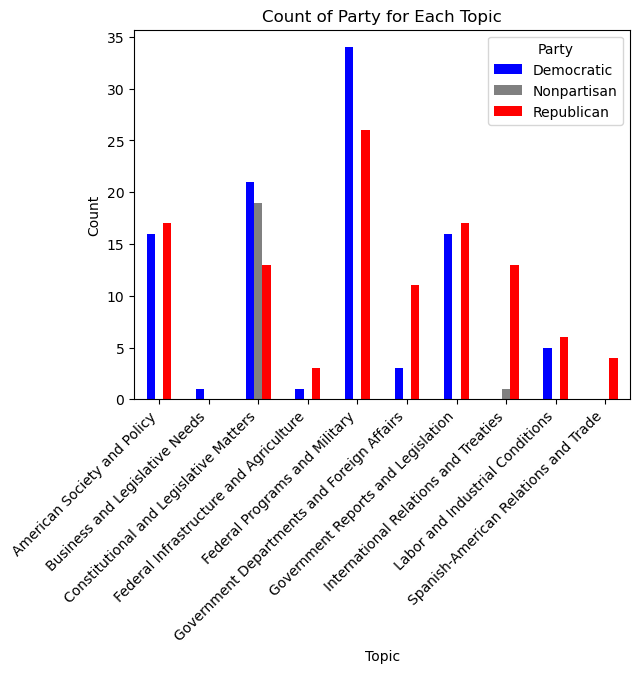

In [58]:
# Count the number of addresses per party for each topic
topic_party_counts = data.groupby(['Topic', 'party']).size().unstack(fill_value=0)

colors = {'Democratic': 'blue', 'Republican': 'red', 'Nonpartisan': 'grey'}

# Plot the bar chart
topic_party_counts.plot(kind='bar', stacked=False, color=[colors.get(party, 'black') for party in topic_party_counts.columns])

plt.title('Count of Party for Each Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Party')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Thanks for your time!